In [1]:
library(readr)
data = read.csv("/content/nutrition_subset.csv")

**Cleaning**

In [2]:
# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values)

      food.item weight_in_grams   saturated_fat     cholesterol 
              0               0               0               0 


>no missing values

**Saturated fat sort**

In [ ]:
saturated_fat_sort = data[order(data$saturated_fat, decreasing = TRUE),][1:5,]
saturated_fat_sort

,food.item,weight_in_grams,saturated_fat,cholesterol
,<chr>,<dbl>,<dbl>,<int>
379,CHEESECAKE 1 CAKE,1110,119.9,2053
536,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188,118.3,703
459,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108,92.0,609
582,CREME PIE 1 PIE,910,90.1,46
891,LARD 1 CUP,205,80.4,195


**Saturated fat per gram**

In [ ]:
data$saturated_fat_per_gram = data$saturated_fat  / data$weight_in_grams
saturated_fat_per_gram_sort = data[order(data$saturated_fat_per_gram, decreasing = TRUE),][1:5,]
saturated_fat_per_gram_sort

,food.item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
,<chr>,<dbl>,<dbl>,<int>,<dbl>
909,BUTTER; SALTED 1 TBSP,14,7.1,31,0.5071429
910,BUTTER; UNSALTED 1 TBSP,14,7.1,31,0.5071429
710,BUTTER; SALTED 1/2 CUP,113,57.1,247,0.5053097
711,BUTTER; UNSALTED 1/2 CUP,113,57.1,247,0.5053097
913,BUTTER; SALTED 1 PAT,5,2.5,11,0.5000000


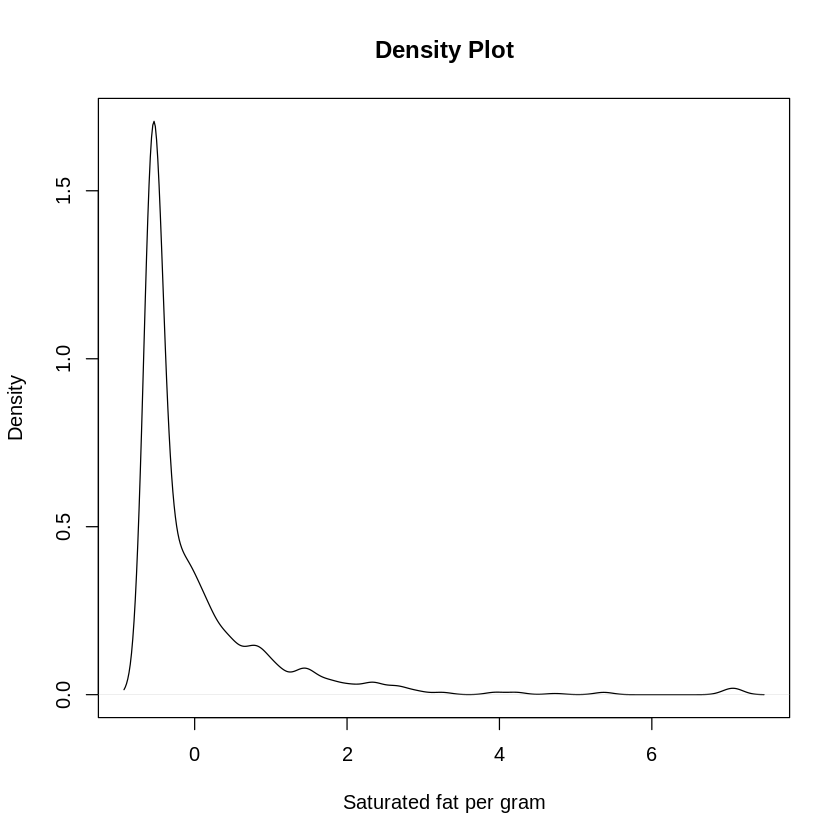

In [ ]:
#plotting
# Create a density plot
plot(density(data$saturated_fat_per_gram), main = "Density Plot", xlab = "Saturated fat per gram", ylab = "Density")


>Butter that is salted has the highest saturated fat per gram

**Standardise saturated fat per gram**

In [ ]:
data$saturated_fat_per_gram = scale(data$saturated_fat_per_gram)
outliers_standard_high = which(data$saturated_fat_per_gram > 3)
#high end outliers
print(data$food.item[outliers_standard_high])
outliers_standard_low = which(data$saturated_fat_per_gram < -3)


#low end outliers (count)
print(length(outliers_standard_low))

 [1] "CHOCOLATE; BITTER OT BAKING   1 OZ    "
 [2] "COCONUT; RAW; SHREDDED        1 CUP   "
 [3] "COCONUT; DRIED; SWEETND;SHREDD1 CUP   "
 [4] "COCONUT; RAW; PIECE           1 PIECE "
 [5] "BUTTER; SALTED                1/2 CUP "
 [6] "BUTTER; UNSALTED              1/2 CUP "
 [7] "LARD                          1 CUP   "
 [8] "FATS; COOKING/VEGETBL SHORTENG1 TBSP  "
 [9] "LARD                          1 TBSP  "
[10] "FATS; COOKING/VEGETBL SHORTENG1 CUP   "
[11] "BUTTER; SALTED                1 TBSP  "
[12] "BUTTER; UNSALTED              1 TBSP  "
[13] "BUTTER; SALTED                1 PAT   "
[14] "BUTTER; UNSALTED              1 PAT   "
[15] "IMITATION CREAMERS; POWDERED  1 TSP   "
[1] 0


>High end outlier foods: [1] "CHOCOLATE; BITTER OT BAKING   1 OZ    "
 [2] "COCONUT; RAW; SHREDDED        1 CUP   "
 [3] "COCONUT; DRIED; SWEETND;SHREDD1 CUP   "
 [4] "COCONUT; RAW; PIECE           1 PIECE "
 [5] "BUTTER; SALTED                1/2 CUP "
 [6] "BUTTER; UNSALTED              1/2 CUP "
 [7] "LARD                          1 CUP   "
 [8] "FATS; COOKING/VEGETBL SHORTENG1 TBSP  "
 [9] "LARD                          1 TBSP  "
[10] "FATS; COOKING/VEGETBL SHORTENG1 CUP   "
[11] "BUTTER; SALTED                1 TBSP  "
[12] "BUTTER; UNSALTED              1 TBSP  "
[13] "BUTTER; SALTED                1 PAT   "
[14] "BUTTER; UNSALTED              1 PAT   "
[15] "IMITATION CREAMERS; POWDERED  1 TSP   "

>Low end outlier foods amount: 0

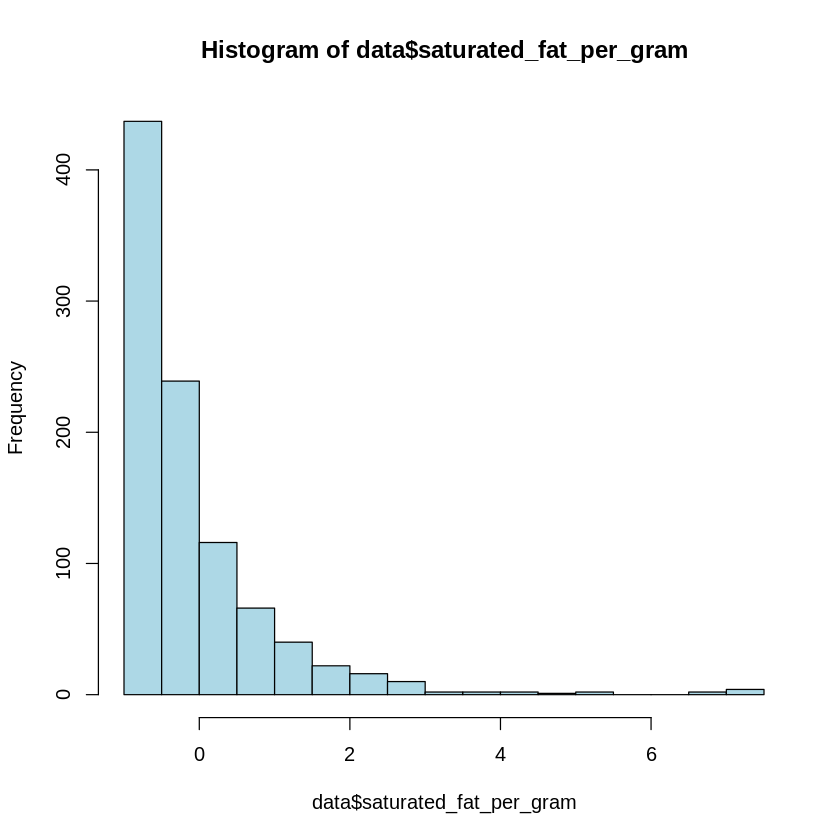

In [ ]:
hist(data$saturated_fat_per_gram, col = "lightblue")

**Missing values**

In [ ]:
#check for missing values
missing_values = sum(is.na(data))
missing_values

[1] 0

**Standardize numeric values**

Weight in grams:

In [ ]:
data$weight_in_grams = scale(data$weight_in_grams)
#low end weight in grams outliers
weight_low = which(data$weight_in_grams < -3)
print(length(weight_low))
#high end
weight_high = which(data$weight_in_grams > 3)
print(length(weight_high))
#high end outlier foods
print(data$food.item[weight_high])



[1] 0
[1] 22
 [1] "CUSTARD PIE                   1 PIE   "
 [2] "FRUITCAKE;DARK; FROM HOMERECIP1 CAKE  "
 [3] "CHEESECAKE                    1 CAKE  "
 [4] "PECAN PIE                     1 PIE   "
 [5] "SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE  "
 [6] "DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE  "
 [7] "CARROT CAKE;CREMCHESE FRST;REC1 CAKE  "
 [8] "YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE  "
 [9] "PUMPKIN PIE                   1 PIE   "
[10] "ICE MILK; VANILLA; 4% FAT     1/2 GAL "
[11] "WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE  "
[12] "LEMON MERINGUE PIE            1 PIE   "
[13] "YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE  "
[14] "ICE CREAM; VANLLA; REGULR 11% 1/2 GALN"
[15] "SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE  "
[16] "ICE CREAM; VANLLA; RICH 16% FT1/2 GAL "
[17] "CHERRY PIE                    1 PIE   "
[18] "PEACH PIE                     1 PIE   "
[19] "BLUEBERRY PIE                 1 PIE   "
[20] "APPLE PIE                     1 PIE   "
[21] "CREME PIE                     1 PIE   "
[22] "SHERBET; 2% FAT

Saturated fat:

In [ ]:
data$saturated_fat = scale(data$saturated_fat)
#low end weight in grams outliers
sf_low = which(data$saturated_fat < -3)
print(length(sf_low))
#high end
sf_high = which(data$saturated_fat > 3)
print(length(sf_high))
#display high end food items for outliers
print(data$food.item[sf_high])

[1] 0
[1] 20
 [1] "FRUITCAKE;DARK; FROM HOMERECIP1 CAKE  "
 [2] "CHEESECAKE                    1 CAKE  "
 [3] "POUND CAKE; COMMERCIAL        1 LOAF  "
 [4] "DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE  "
 [5] "CARROT CAKE;CREMCHESE FRST;REC1 CAKE  "
 [6] "YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE  "
 [7] "PUMPKIN PIE                   1 PIE   "
 [8] "YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE  "
 [9] "ICE CREAM; VANLLA; REGULR 11% 1/2 GALN"
[10] "SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE  "
[11] "ICE CREAM; VANLLA; RICH 16% FT1/2 GAL "
[12] "CREME PIE                     1 PIE   "
[13] "WHIPPING CREAM; UNWHIPED;HEAVY1 CUP   "
[14] "WHIPPING CREAM; UNWHIPED;LIGHT1 CUP   "
[15] "BUTTER; SALTED                1/2 CUP "
[16] "BUTTER; UNSALTED              1/2 CUP "
[17] "LARD                          1 CUP   "
[18] "PEANUT OIL                    1 CUP   "
[19] "SOYBEAN-COTTONSEED OIL; HYDRGN1 CUP   "
[20] "FATS; COOKING/VEGETBL SHORTENG1 CUP   "


Cholesterol:

In [ ]:
data$cholesterol = scale(data$cholesterol)
#low end weight in grams outliers
c_low = which(data$cholesterol < -3)
print(length(c_low))
#high end
c_high = which(data$cholesterol > 3)
print(length(c_high))
#display high end food items for outliers
print(data$food.item[c_high])

[1] 0
[1] 17
 [1] "BEEF LIVER; FRIED             3 OZ    "
 [2] "POUND CAKE; FROM HOME RECIPE  1 LOAF  "
 [3] "CUSTARD PIE                   1 PIE   "
 [4] "FRUITCAKE;DARK; FROM HOMERECIP1 CAKE  "
 [5] "CHEESECAKE                    1 CAKE  "
 [6] "POUND CAKE; COMMERCIAL        1 LOAF  "
 [7] "PECAN PIE                     1 PIE   "
 [8] "SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE  "
 [9] "DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE  "
[10] "CARROT CAKE;CREMCHESE FRST;REC1 CAKE  "
[11] "YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE  "
[12] "PUMPKIN PIE                   1 PIE   "
[13] "LEMON MERINGUE PIE            1 PIE   "
[14] "YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE  "
[15] "ICE CREAM; VANLLA; REGULR 11% 1/2 GALN"
[16] "SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE  "
[17] "ICE CREAM; VANLLA; RICH 16% FT1/2 GAL "


**Summary**

As we see from our analysis: We sorted the data by saturated fat and then displayed the highest saturated fat foods. We next added a column to look at foods and identify their saturated fat per gram and then displayed the foods with the highest saturated fat per gram. We then standardized all the numeric values and identified all outliers.